Drive klasörünü bağla

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


gerekli kütüphaneleri yükle

In [58]:
# Import TensorFlow
import tensorflow

# Import Numpy and Matplotlib
import numpy
import matplotlib.pyplot

import random

veri setlerini yükle

In [59]:
y_train = numpy.load("/content/drive/MyDrive/Data/y_train.npy")
x_test = numpy.load("/content/drive/MyDrive/Data/x_test.npy")
y_test = numpy.load("/content/drive/MyDrive/Data/y_test.npy")
x_valid = numpy.load("/content/drive/MyDrive/Data/x_valid.npy")
y_valid = numpy.load("/content/drive/MyDrive/Data/y_valid.npy")
x_train = numpy.load("/content/drive/MyDrive/Data/x_train.npy")

rastgele bir resim yükle

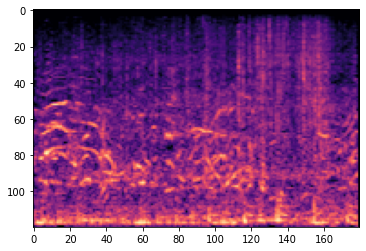

In [60]:
matplotlib.pyplot.imshow(x_train[2341])
matplotlib.pyplot.show()

modeli olustur

In [61]:
model = tensorflow.keras.Sequential()

katmanları sınıflandır

In [62]:
# Add the dense layer and dropout layer
model.add(tensorflow.keras.layers.Dense(32, activation = "relu"))
model.add(tensorflow.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tensorflow.keras.layers.Dense(16, activation = "relu"))
model.add(tensorflow.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tensorflow.keras.layers.Dense(8, activation = "relu"))
model.add(tensorflow.keras.layers.Dropout(0.5))

convolution ve max pooling layerlarını ekle

In [63]:
model.add(tensorflow.keras.layers.Conv2D(16,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding= "same",
                                 activation ="relu",
                                 input_shape =(120,180,3)))

model.add(tensorflow.keras.layers.MaxPooling2D((2,2)))

convolution katmanını düzleştir

In [64]:
# Flatten the convolution layer
model.add(tensorflow.keras.layers.Flatten())

output layer

In [65]:
# Add the output layer
model.add(tensorflow.keras.layers.Dense(10,activation ="softmax"))

Optimise

In [66]:
# Compile the model
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

Train Model

In [ ]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 50,
                    validation_data = (x_valid, y_valid))

Epoch 1/50
219/219 [==============================] - 155s 704ms/step - loss: 1.6536 - accuracy: 0.4469 - val_loss: 3.5401 - val_accuracy: 0.0000e+00
Epoch 2/50
219/219 [==============================] - 154s 704ms/step - loss: 1.0954 - accuracy: 0.6012 - val_loss: 3.6263 - val_accuracy: 0.0069
Epoch 3/50
219/219 [==============================] - 155s 710ms/step - loss: 0.8742 - accuracy: 0.6965 - val_loss: 3.8483 - val_accuracy: 0.0218
Epoch 4/50
219/219 [==============================] - 151s 690ms/step - loss: 0.7300 - accuracy: 0.7468 - val_loss: 4.0347 - val_accuracy: 0.0286
Epoch 5/50
219/219 [==============================] - 152s 694ms/step - loss: 0.5975 - accuracy: 0.7917 - val_loss: 4.6524 - val_accuracy: 0.0183
Epoch 6/50
219/219 [==============================] - 154s 701ms/step - loss: 0.5056 - accuracy: 0.8258 - val_loss: 4.2050 - val_accuracy: 0.0435
Epoch 7/50
219/219 [==============================] - 157s 716ms/step - loss: 0.4086 - accuracy: 0.8551 - val_loss: 4.38

Sonuçları görselleştir

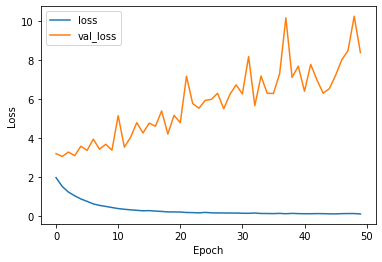

In [ ]:
# Plot the the training loss
matplotlib.pyplot.plot(results.history["loss"],label = "loss")

# Plot the the validation loss
matplotlib.pyplot.plot(results.history["val_loss"], label = "val_loss")

# Name the x and y axises
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Loss")

# Put legend table
matplotlib.pyplot.legend()

# Show the plot
matplotlib.pyplot.show()

Gerçekçilik testi

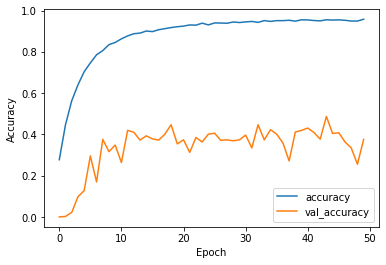

In [ ]:
# Plot the the training accuracy
matplotlib.pyplot.plot(results.history["accuracy"], label = "accuracy")

# Plot the the validation accuracy
matplotlib.pyplot.plot(results.history["val_accuracy"], label = "val_accuracy")

# Name the x and y axises
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Accuracy")
# Put legend table
matplotlib.pyplot.legend()

# Show the plot
matplotlib.pyplot.show()

Performans Testi

In [ ]:
# Evaluate the performance
model.evaluate(x_test, y_test)

28/28 [==============================] - 13s 454ms/step - loss: 29.5477 - accuracy: 0.0000e+00


[29.547712326049805, 0.0]

Tahmin yürütme

In [ ]:
# Make prediction on the reshaped sample
randomSpec = random.randint(0,len(x_test)-1)

prediction_result = model.predict(x_test[randomSpec].reshape(1,120,180,3))

# Print the prediction result
prediction_result

array([[9.4757787e-12, 1.1808702e-16, 1.0000000e+00, 1.3346045e-08,
        1.3575124e-20, 1.3146985e-11, 1.8075418e-24, 2.8591871e-22,
        1.7722034e-15, 2.8458494e-35]], dtype=float32)

Tahmin sonucunu ve olasılığı hesapla

In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [ ]:
# Print the results
print(f"Bu ses, % {predicted_probability} ihtimalle {predicted_class} sınıfına ait")

Bu ses, % 0.9931133389472961 ihtimalle 2 sınıfına ait


Doğruluğu test et

In [ ]:
if predicted_class == y_test[randomSpec]:
  print("Tahmin Başarılı")
else:
  print("Malesef")

Malesef
